In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [4]:
systolic = []
diastolic = []

for entry in df['Blood Pressure']:
    entry = entry.split("/")
    systolic.append(entry[0])
    diastolic.append(entry[1])
    

In [5]:
df['systolic'] = systolic
df['diastolic'] = diastolic

df.drop(labels=['Blood Pressure'], inplace=True, axis=1)

In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [7]:
df.drop(labels=['Person ID'], inplace=True, axis = 1)

In [8]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [9]:
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].factorize()[0]

In [10]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,0,27,0,6.1,6,42,6,0,77,4200,0,0,0
1,0,28,1,6.2,6,60,8,1,75,10000,0,1,1
2,0,28,1,6.2,6,60,8,1,75,10000,0,1,1
3,0,28,2,5.9,4,30,8,2,85,3000,1,2,2
4,0,28,2,5.9,4,30,8,2,85,3000,1,2,2


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'BMI Category'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>,
        <Axes: title={'center': 'Sleep Disorder'}>,
        <Axes: title={'center': 'systolic'}>],
       [<Axes: title={'center': 'diastolic'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

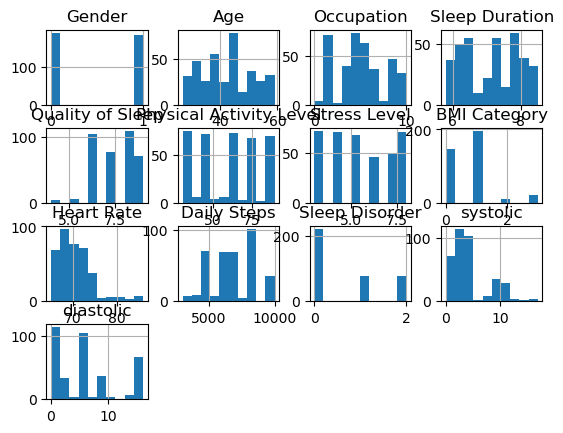

In [11]:
df.hist()

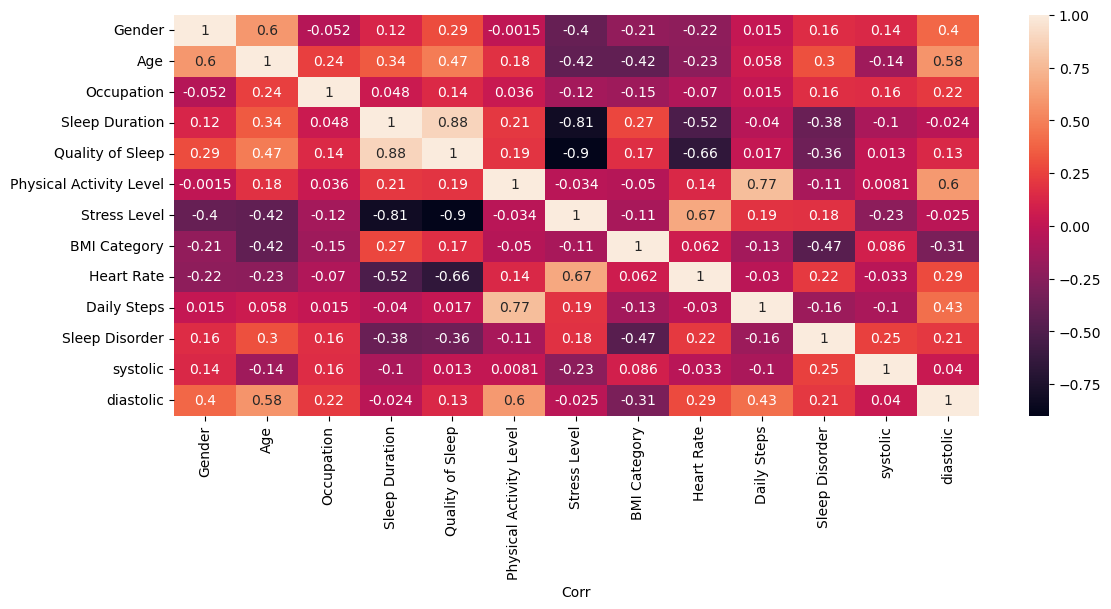

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Sleep Disorder'], df['Sleep Disorder'], test_size=0.3)

In [14]:
set(y_train)

{0, 1, 2}

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9348659003831418, 0.9026548672566371)

In [16]:
# Hyper-Parameter Tuning using Optuna
import optuna
from math import sqrt

def objective(trial):
    
    # Split the Data Each time
    X_train, X_valid, y_train, y_valid = train_test_split(df.loc[:, df.columns != 'Sleep Disorder'], df['Sleep Disorder'], test_size=0.3)
    
    # Set the Parameters
    max_depth = int(trial.suggest_int('max_depth', 1, 32))
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    min_samples_split = int(trial.suggest_int('min_samples_split', 2, 10))
    min_samples_leaf = int(trial.suggest_int('min_samples_leaf', 1, 10))
    max_feature = trial.suggest_categorical('max_feature', ['auto', 'sqrt', 'log2'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    
    try:
        model = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_feature, splitter=splitter)
        model.fit(X_train, y_train)

        return model.score(X_valid, y_valid)
    
    except:
        
        return 0

In [17]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=400)

[I 2023-05-26 18:41:07,676] A new study created in memory with name: no-name-81e2a602-e640-4905-bcec-8b54c1f2cba5
[I 2023-05-26 18:41:07,686] Trial 0 finished with value: 0.9026548672566371 and parameters: {'max_depth': 2, 'criterion': 'log_loss', 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_feature': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.9026548672566371.
[I 2023-05-26 18:41:07,694] Trial 1 finished with value: 0.9026548672566371 and parameters: {'max_depth': 11, 'criterion': 'log_loss', 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_feature': 'log2', 'splitter': 'random'}. Best is trial 0 with value: 0.9026548672566371.
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
[I 2023-05-26 18:41:07,703] Trial 2 finished with value: 0.7699115044247787 and parameters:

In [18]:
study.best_params, study.best_value

({'max_depth': 13,
  'criterion': 'log_loss',
  'min_samples_split': 8,
  'min_samples_leaf': 5,
  'max_feature': 'auto',
  'splitter': 'best'},
 0.9646017699115044)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9348659003831418, 0.8938053097345132)

In [20]:
# Hyper-Parameter Tuning using Optuna
from math import sqrt

def objective(trial):
    
    # Split the Data Each time
    X_train, X_valid, y_train, y_valid = train_test_split(df.loc[:, df.columns != 'Sleep Disorder'], df['Sleep Disorder'], test_size=0.3)
    
    # Set the Parameters
    n_estimator = trial.suggest_int('n_estimators', 2, 400)
    max_depth = int(trial.suggest_int('max_depth', 1, 32))
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    min_samples_split = int(trial.suggest_int('min_samples_split', 2, 10))
    min_samples_leaf = int(trial.suggest_int('min_samples_leaf', 1, 10))
    max_feature = trial.suggest_categorical('max_feature', ['auto', 'sqrt', 'log2'])
    
    try:
        model = RandomForestClassifier(n_estimators=n_estimator, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_feature)
        model.fit(X_train, y_train)

        return model.score(X_valid, y_valid)
    
    except:
        
        return 0

In [21]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2023-05-26 18:41:24,223] A new study created in memory with name: no-name-077e6c80-3f6a-4910-bc11-fcab3bf679f9
[I 2023-05-26 18:41:24,524] Trial 0 finished with value: 0.8938053097345132 and parameters: {'n_estimators': 163, 'max_depth': 12, 'criterion': 'log_loss', 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_feature': 'sqrt'}. Best is trial 0 with value: 0.8938053097345132.
[I 2023-05-26 18:41:24,553] Trial 1 finished with value: 0.9026548672566371 and parameters: {'n_estimators': 11, 'max_depth': 11, 'criterion': 'log_loss', 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_feature': 'sqrt'}. Best is trial 1 with value: 0.9026548672566371.
[I 2023-05-26 18:41:24,875] Trial 2 finished with value: 0.911504424778761 and parameters: {'n_estimators': 177, 'max_depth': 32, 'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_feature': 'sqrt'}. Best is trial 2 with value: 0.911504424778761.
[I 2023-05-26 18:41:25,024] Trial 3 finished with value: 0.876106

In [22]:
study.best_params, study.best_value

({'n_estimators': 205,
  'max_depth': 19,
  'criterion': 'gini',
  'min_samples_split': 3,
  'min_samples_leaf': 4,
  'max_feature': 'log2'},
 0.9646017699115044)

In [23]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.6360153256704981, 0.672566371681416)